# kaggler를 대상으로 한 설문조사


## 데이터 파일 
* schema.csv
* multipleChoiceResponses.csv
* feeformResponses.csv
* conversionRates.csv

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 중지 및 경고 무시
import warnings 
warnings.filterwarnings('ignore')

**shape** : 행과 열의 개수를 tuple 형식으로 반환

In [2]:
question = pd.read_csv('datasets/survey2017/schema.csv')
question.shape

(290, 3)

In [3]:
# head()

question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# tail()

question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# pandas로 선다형 객관식 문제에 대한 응답을 가져 옴

mcq = pd.read_csv('datasets/survey2017/multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

**coulmns** : dataframe의 columns 이름을 읽어옴

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### missingno 
  : missingno는 NaN 데이터들에 대해서 시각화 함


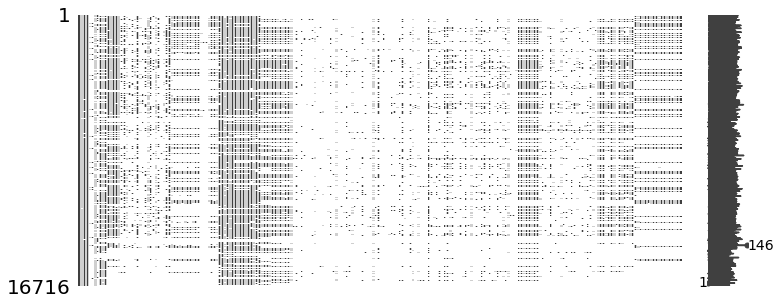

In [8]:
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 16716명의 데이터와 228개 선다형 객관식문제, 62개 주관식 질문에 대한 응답(총 290개 질문) 

## 설문통계

**countplot** : 범주형 변수의 빈도수 시각화(dataframe에서만 사용)

  → countplot(x='column_name', data=dataframe_name)

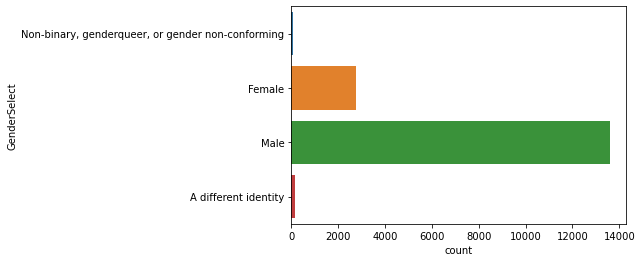

In [9]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

**value_counts()** : 그룹화 시켜서 해당하는 column 값 count

**reset_index()** : 기존의 column 인덱스를 제거하고 인덱스를 데이터 row로 추가

In [10]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())

# con_df의 Country가 현재 index, Country를 담는 column이 없으므로 '국가'라는 컬럼 생성
con_df['국가'] = con_df.index
# 현재 column 이름을 순서대로 '응답 수', '국가'로 저장
con_df.columns = ['응답 수','국가']

con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
# 연령에 따른 산술 통계
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

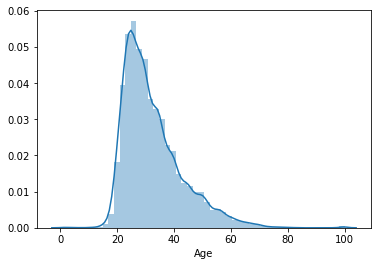

In [12]:
sns.distplot(mcq[mcq["Age"]>0]["Age"])

Age가 0인 값을 제외하고 Age Column에 대해 distplot 그래프로 나타냄

### 학력

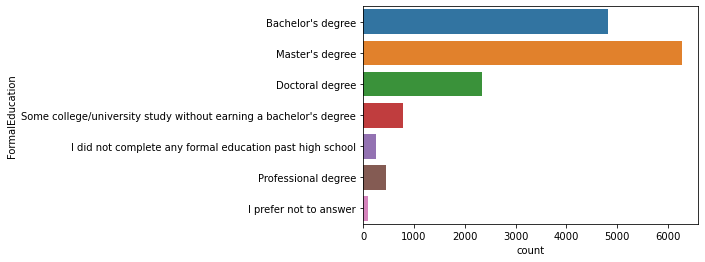

In [13]:
sns.countplot(y='FormalEducation', data=mcq)

### 전공

**normalize = True** 옵션을 사용하면, 해당 데이터가 전체 데이터에서 어느정도 비율을 차지하는지 알 수 있음

**merge(dataframe, left_index=True, right_index=True)** : merge후 dataframe을 일반 데이터 열이 아닌 인덱스를 기준열로 사용하려면 left_index, right_index 인수를 True로 설정해야 함

In [14]:
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


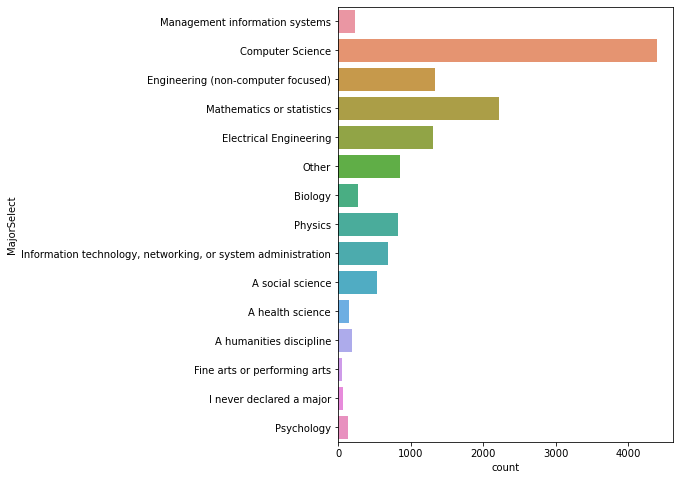

In [15]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

### 취업 여부

In [16]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수','비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


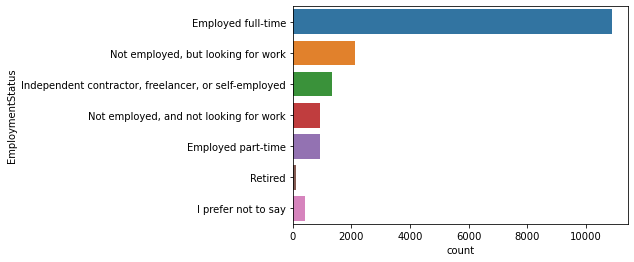

In [17]:
sns.countplot(y='EmploymentStatus',data=mcq)

### 프로그래밍 경험

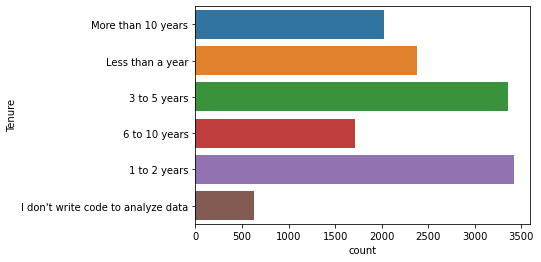

In [18]:
sns.countplot(y='Tenure', data=mcq)

**dropna()** : 결측값(NaN) 처리 제거하기

- dropna()의 default는 row기준으로 삭제하기
- dropna(axis=1)는 column 기준으로 삭제하기를 의미

The number of interviewees in Korea: 194


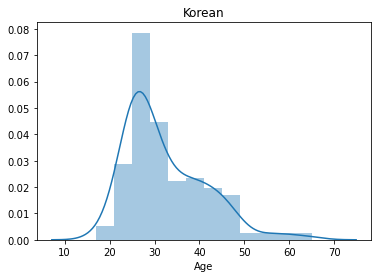

In [19]:
# Country가 South Korea인 사람만 추출
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: '+ str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [20]:
# Male & Female 수 카운팅 
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

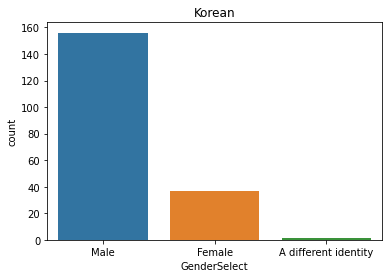

In [21]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

**subplots(nrows=n,nrows=n)** : 그래프를 한 번에 여러개 표현하는 방법
- **fig**(figure) : 전체 subplot을 의미, 전체 사이즈
- **ax**(axe) : 전체 subplot 중에서 낱개를 의미
- ncols : 몇행을 만들건지
- nrows : 몇열을 만들것인지

Text(0.5, 1.0, 'Korean Male')

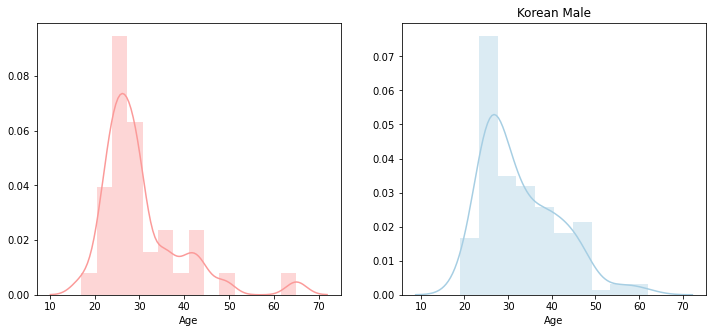

In [22]:
figure, (ax1,ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
plt.title('Korean Male')


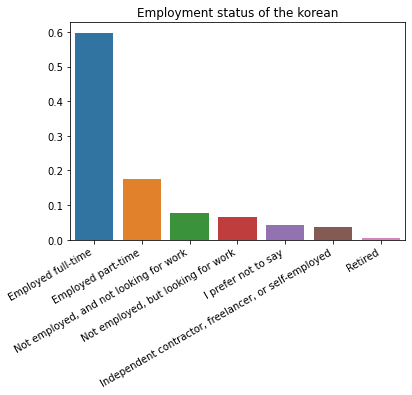

In [23]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

**xticks()** : x축 눈금 값 설정

**option**

- rotation : 레이블 텍스트 회전
- ha='position' : 회전된 레이블 텍스트의 position에 맞춤

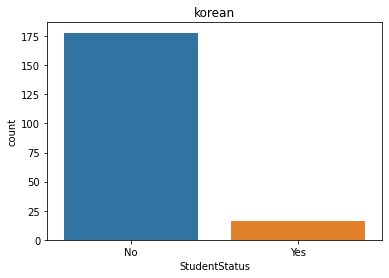

In [24]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [25]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
